In [1]:
#wind power generation forcasting


In [2]:
pip install pandas numpy 


In [3]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd #used for data manipulation 
import numpy as np #numerical calculation like vector scalar tensor,linear algebra
import matplotlib.pyplot as plt#visualisation library
import seaborn as sns #advanced data visualization library
from sklearn.model_selection import train_test_split#sk-learn machine learning
from sklearn.preprocessing import StandardScaler #scaling

In [5]:
#lOAD THE FILES
location1=pd.read_csv('Location1.csv')
location2=pd.read_csv('Location2.csv')
location3=pd.read_csv('Location3.csv')
location4=pd.read_csv('Location4.csv')

In [6]:
location1.head() #show top5 rows,we can also pass paraameter eg to see 10 rows

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,02-01-2017 00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,02-01-2017 01:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,02-01-2017 02:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,02-01-2017 03:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,02-01-2017 04:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [7]:
#add new column to identify the location
location1['Location']='Location1.csv'
location2['Location']='Location2.csv'
location3['Location']='Location3.csv'
location4['Location']='Location4.csv'
#concatenate to data frame
merged_data=pd.concat([location1,location2,location3,location4] ,ignore_index=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,02-01-2017 00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1.csv
1,02-01-2017 01:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1.csv
2,02-01-2017 02:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1.csv
3,02-01-2017 03:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1.csv
4,02-01-2017 04:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1.csv


In [8]:
merged_data.to_csv('merged_locations.csv',index=False)

In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [10]:
#to check the statistics of dataset
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [11]:
#check the missing values
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [12]:
#to check the duplicate value
merged_data.duplicated().sum()

0

In [13]:
# encoding coverting string(catagorical string) to nos
merged_data=pd.get_dummies(merged_data,columns=['Location'],drop_first=True)
merged_data.head()


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2.csv,Location_Location3.csv,Location_Location4.csv
0,02-01-2017 00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,02-01-2017 01:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,02-01-2017 02:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,02-01-2017 03:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,02-01-2017 04:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [14]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power',
       'Location_Location2.csv', 'Location_Location3.csv',
       'Location_Location4.csv'],
      dtype='object')

In [15]:
# remove time as no there is no need 
merged_data.drop('Time', axis=1, inplace=True)

In [16]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2.csv,Location_Location3.csv,Location_Location4.csv
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [17]:
#week 2 :EDA exploratory data analysis

In [18]:
numerical_columns=merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2.csv',
       'Location_Location3.csv', 'Location_Location4.csv'],
      dtype='object')

In [19]:
merged_data.shape


(175200, 12)

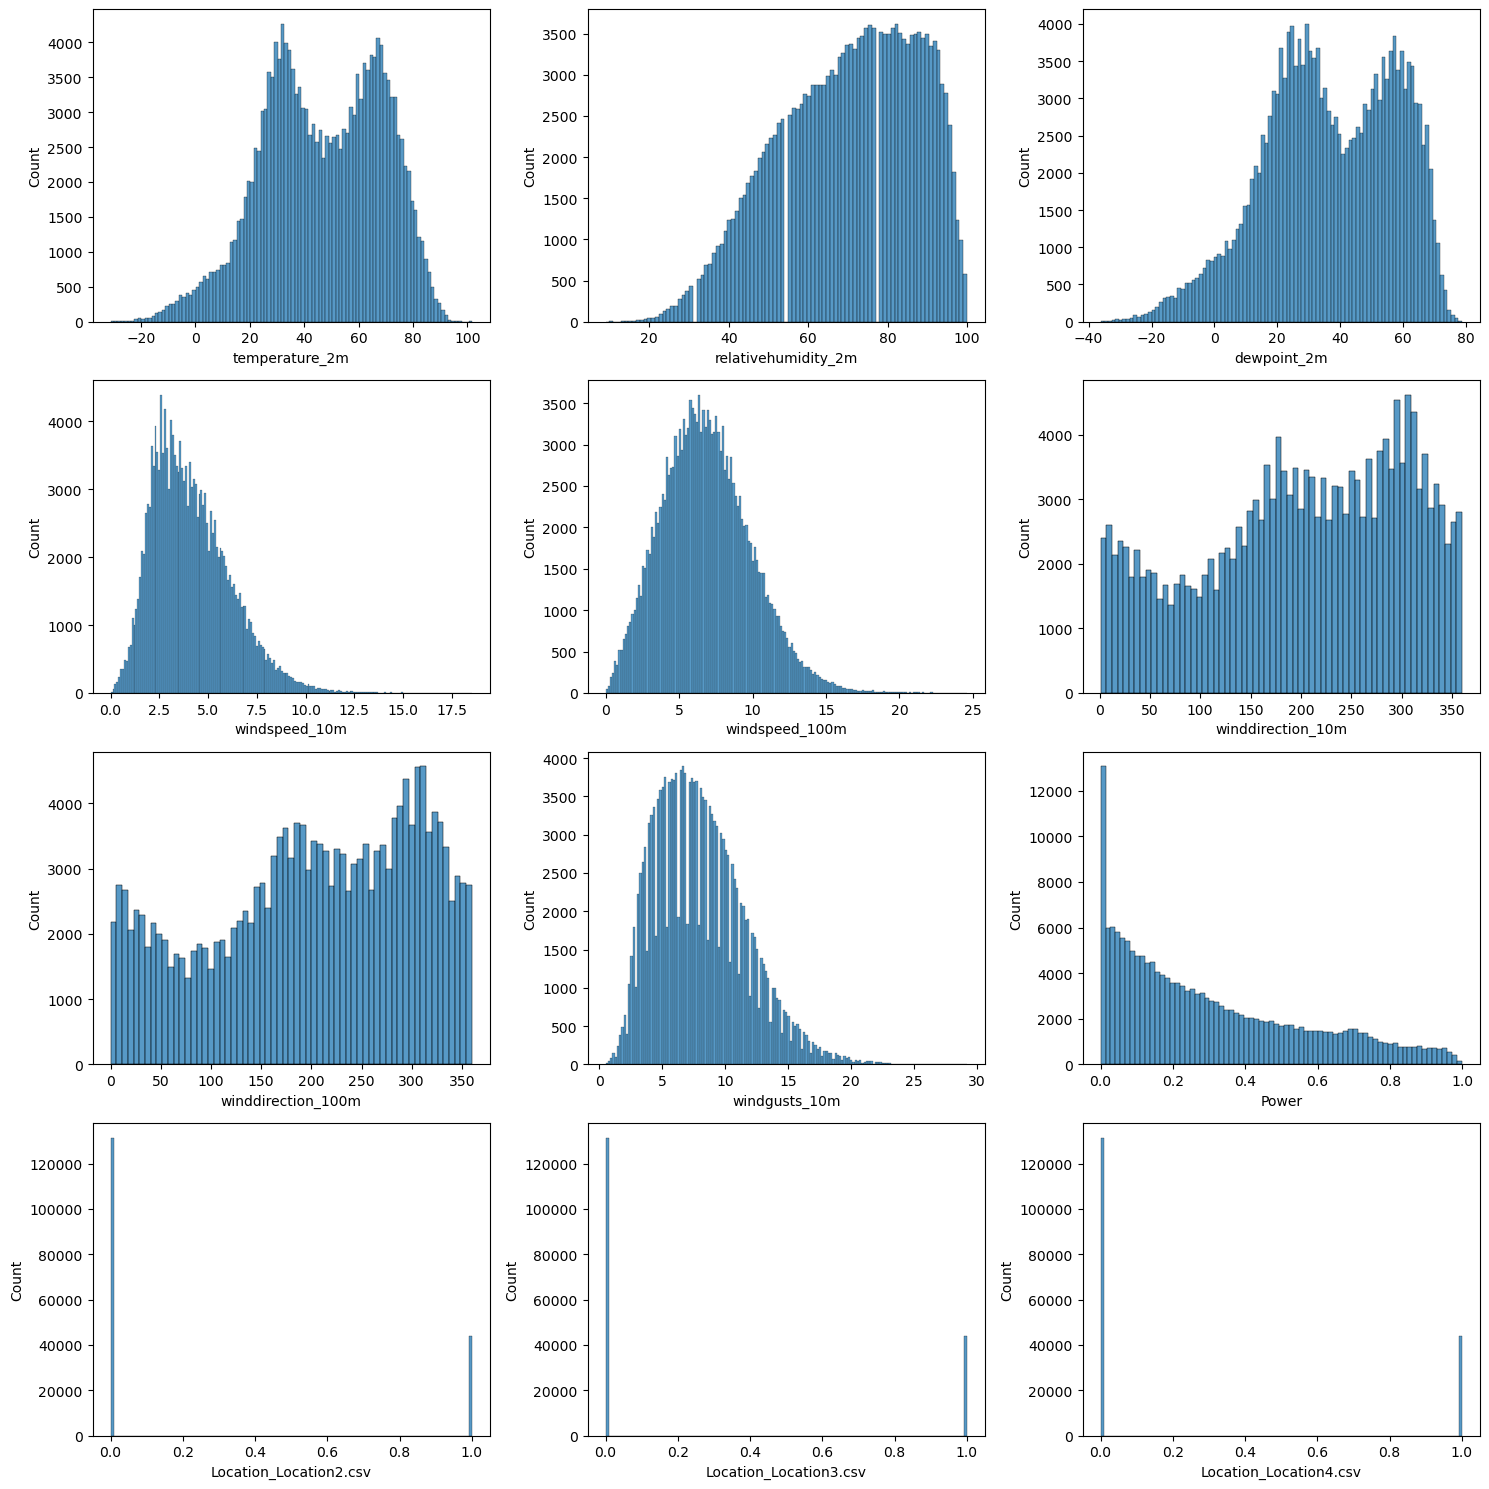

In [20]:
fig,axes=plt.subplots(4,3,figsize=(15,15))
axes=axes.flatten()#we have 2d rows so for that we have indices ,row/cols so coverting it into 1d
for i,col in enumerate(numerical_columns):
    sns.histplot(merged_data[col],ax=axes[i])
plt.tight_layout()
plt.show()

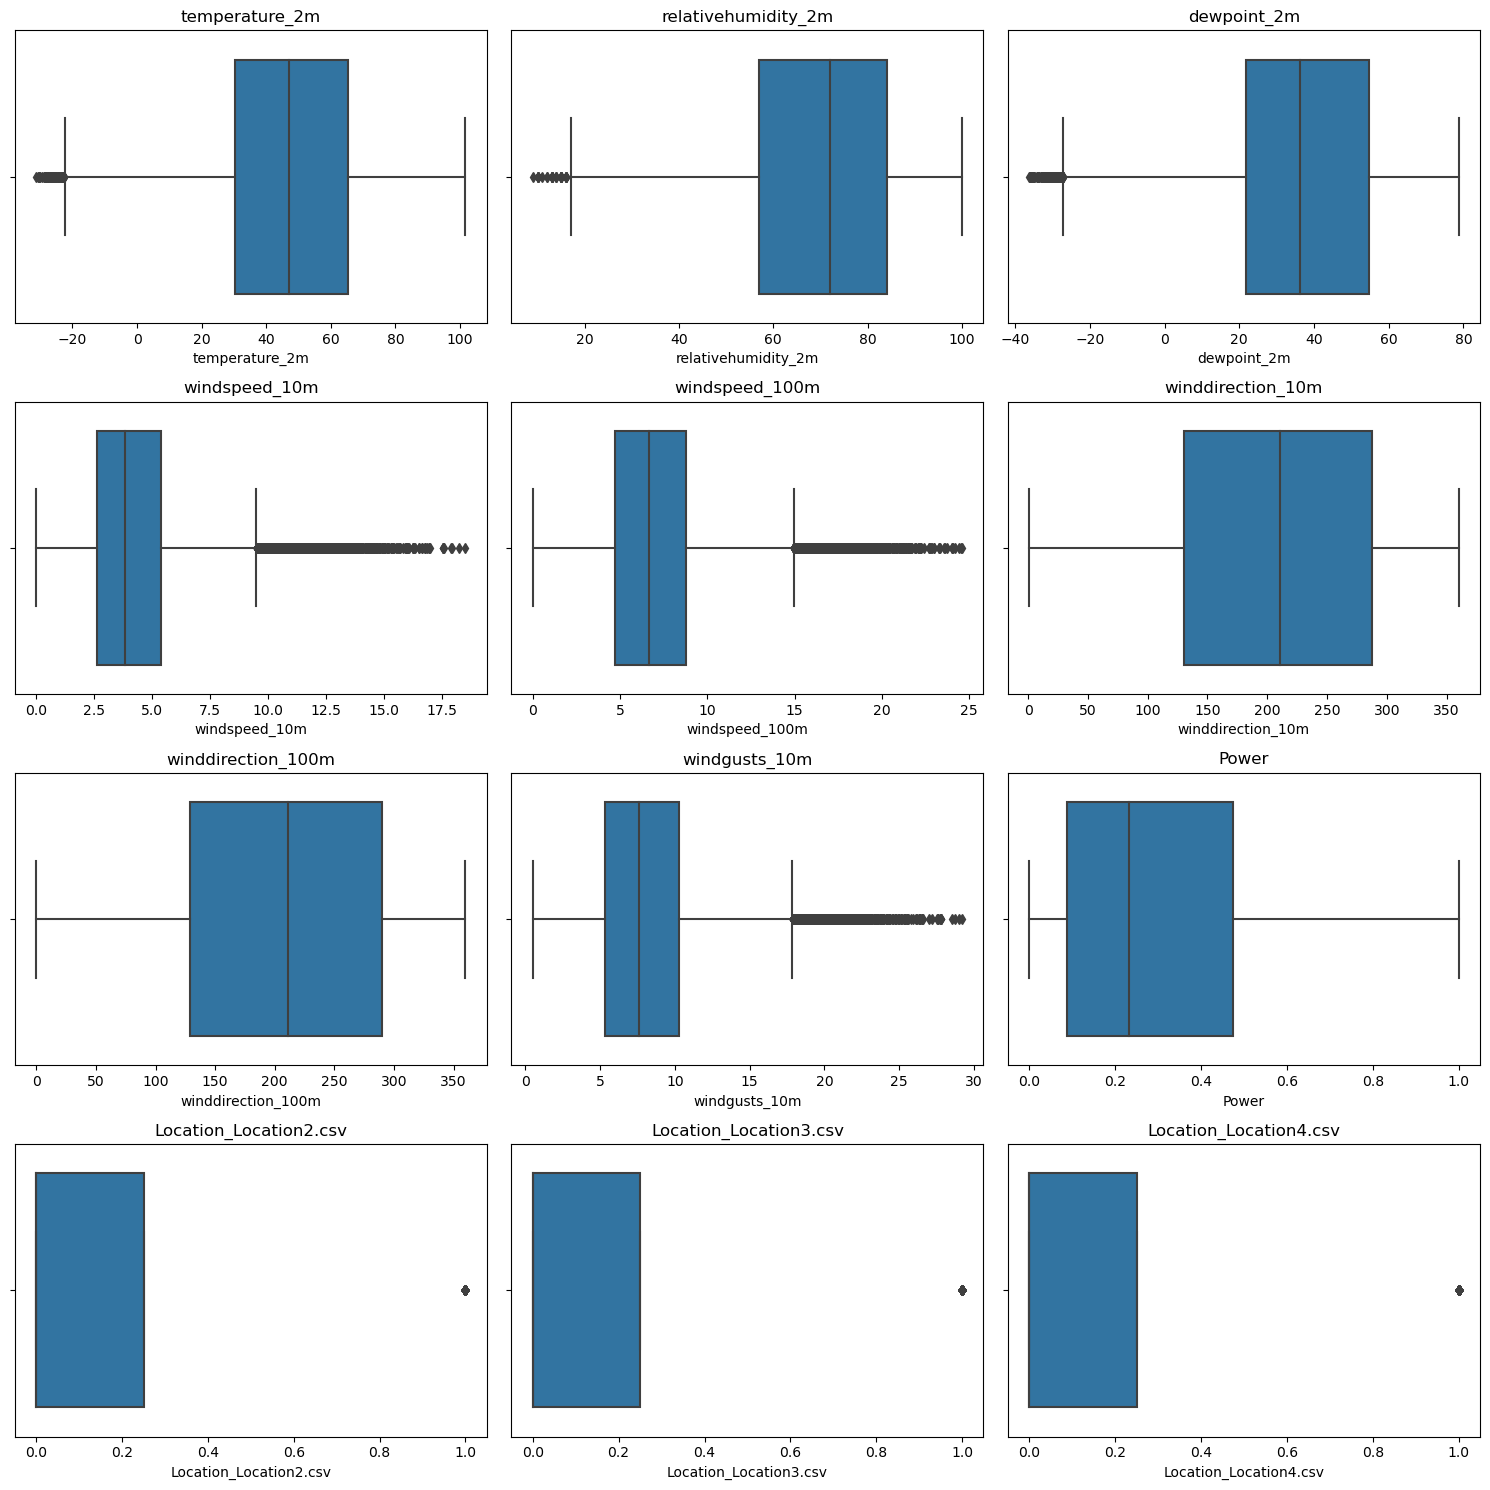

In [21]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()
    

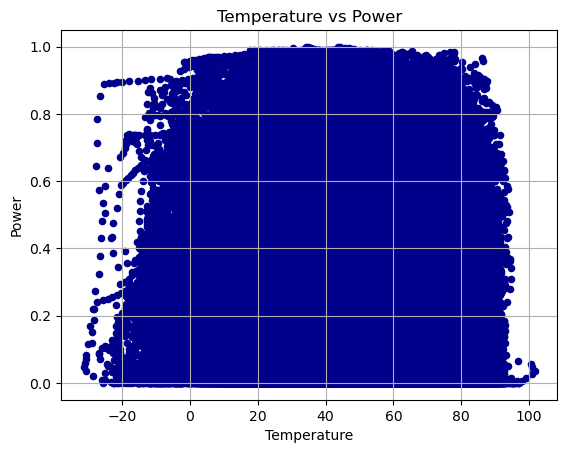

In [22]:
#lets use scatterplot to see relation between power and temp
merged_data.plot.scatter(x='temperature_2m',y='Power',c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

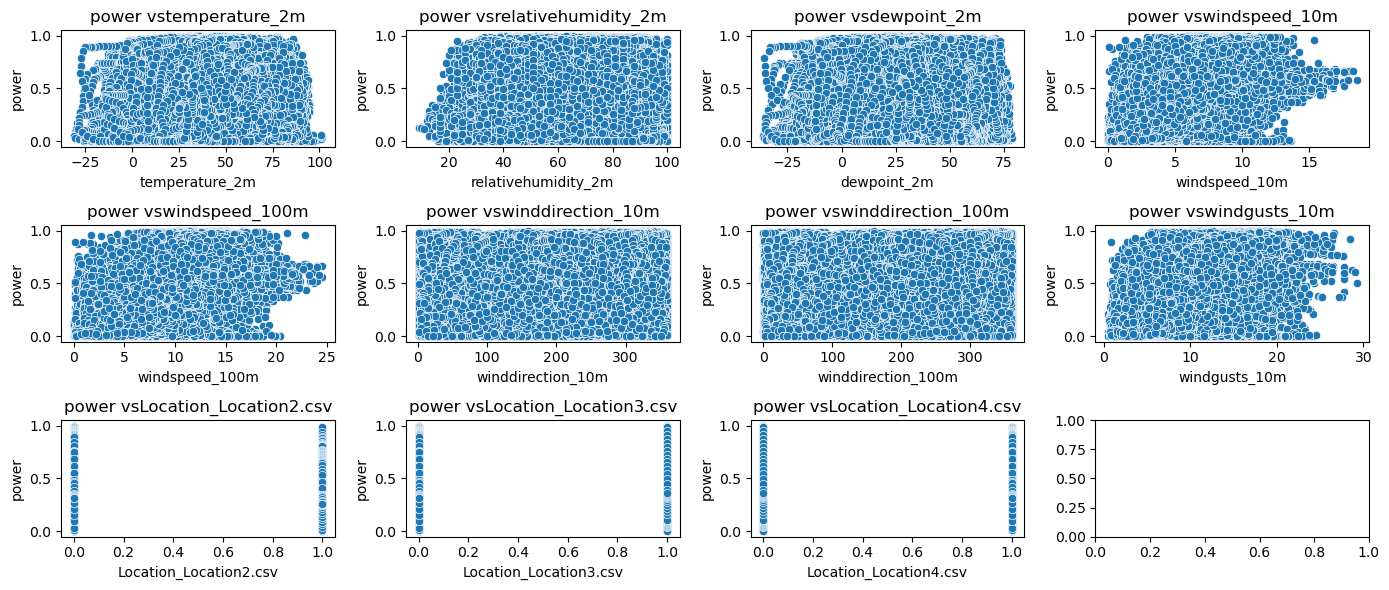

In [23]:
# creating multiple plots to see the relation bw diffrent cols and power
fig,axes=plt.subplots(3,4,figsize=(14,6))
axes=axes.flatten()
for i,col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col,y='Power',data=merged_data,ax=axes[i])
    axes[i].set_title(f'power vs{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('power')
plt.tight_layout()
plt.show()
    

<function matplotlib.pyplot.show(close=None, block=None)>

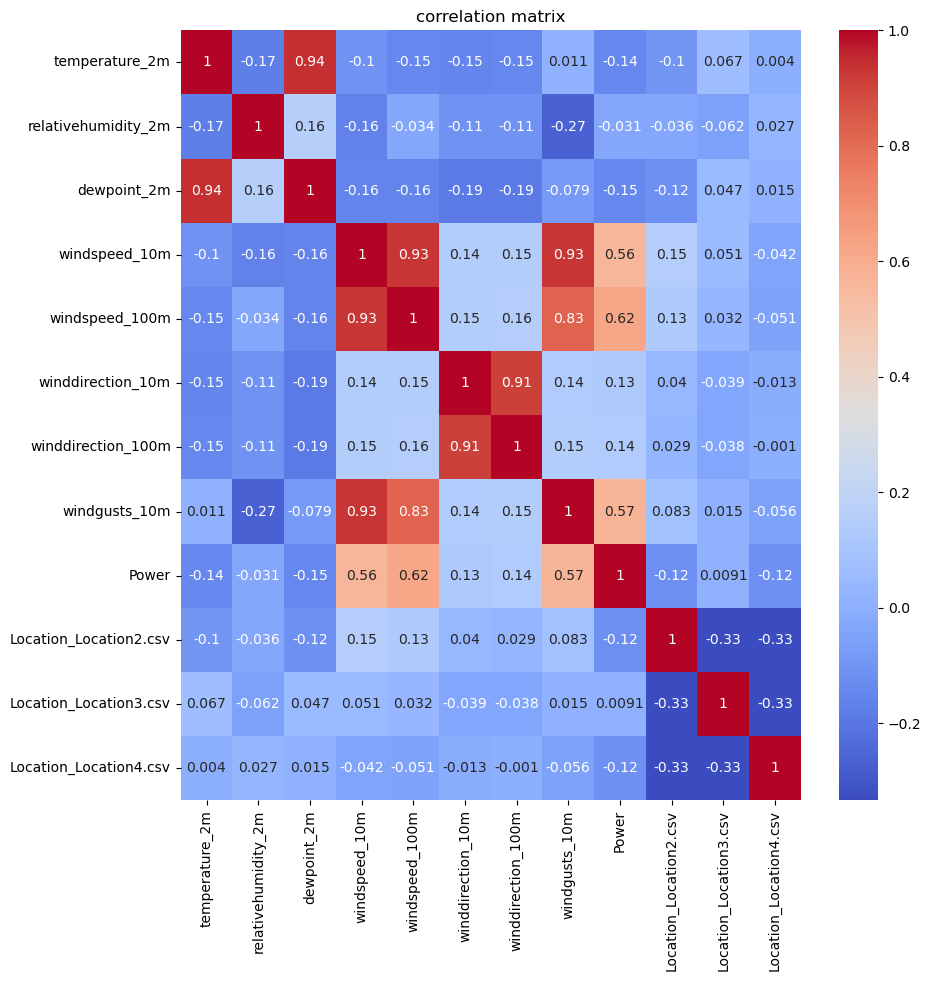

In [24]:
# check the correlation between the columns and power
correlation=merged_data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show

In [25]:
##data modelling and evalaute


In [26]:
# Feature and target selection
X = merged_data.drop('Power', axis=1) # features
y = merged_data['Power'] # target

In [27]:
# Split the data into training and test sets - 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [30]:
print(merged_data.columns)


Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2.csv',
       'Location_Location3.csv', 'Location_Location4.csv'],
      dtype='object')


In [31]:
# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.1376585805337513
Mean Squared Error: 0.03254230698731513
R Squared Score: 0.5127994646410983


In [32]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10662940119863015
RF MSE: 0.02155910436314834
RF R2 Score: 0.6772322505691262


In [34]:
# Train using XGBoost Regressor Model
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')

XGB MAE: 0.11572619130940615
XGB MSE: 0.024946639423317377
XGB R2: 0.6265164578779464


In [36]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')
# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MAE: 0.11374675082949737
Tuned Model Mean Absolute Error (MAE): 0.1131709154430981
Tuned Model Mean Squared Error (MSE): 0.023857462093758833
Tuned Model R^2 Score: 0.642822854909618


In [37]:
input_data = [[28.4,86,24.7,2.06,3.99,151,158,4.4,0.2,0.6,0.7]]
scaled_input = scaler.transform(input_data)
predicted_output = model.predict(scaled_input)
print(f"Predicted Wind Power Output: {predicted_output[0]:.2f} MW")

Predicted Wind Power Output: 0.06 MW


C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# saving the predicted model
import pickle 
data = {
    'model': grid_search,
    'scaler': scaler
}

with open('windpower.sav', 'wb') as file:
    pickle.dump(data, file)
with open('windpower.sav', 'rb') as file:
    data = pickle.load(file)

model = data['model']
scaler = data['scaler']

# New input (replace with actual values as per your model)
input_data = [[28.4, 86, 24.7, 2.06, 3.99, 151, 158, 4.4, 0.2, 0.6, 0.7]]

# Scale the input
scaled_input = scaler.transform(input_data)

# Predict
predicted_output = model.predict(scaled_input)

print(f"Predicted Wind Power Output: {predicted_output[0]:.2f} MW")

C:\Users\Nidhi Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Wind Power Output: 0.18 MW
